In [1]:
# Análisis y procesamiento de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de aprendizaje 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import MinMaxScaler

# Métricas
from sklearn import metrics

# Guardado de modelos
import joblib


In [2]:
df = pd.read_csv("./dataLimpia.csv")
df.head()

,Edad,Altura,Peso,estado_fisico,salud,alimentacion,fruta_consumo,verdura_consumo,genero,actividad_fisica,...,motivo__Salud,disponibilidad_tiempo,experiencia_fuerza,experiencia_cardio,acceso,preferencia_area,intensidad,IMC,grasa_corporal,grasa_corporal_magra
0,22,1.59,145.0,7.0,9.0,3.0,4.0,4.0,0,0,...,1,0,0,0,0,0,0,26.07,30.94,48.73
1,22,1.84,205.0,7.0,9.0,3.0,2.0,3.0,1,1,...,0,1,0,0,1,1,0,27.52,21.88,67.54
2,20,1.70,122.0,1.0,7.0,4.0,2.0,2.0,1,1,...,0,1,0,0,0,2,1,19.19,11.43,44.81
3,25,1.63,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,2,...,0,1,0,1,0,3,0,20.53,24.99,43.35
4,18,1.71,110.0,4.0,6.0,3.0,3.0,4.0,1,1,...,0,1,1,1,0,4,0,17.10,8.46,41.45


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Edad                           318 non-null    int64  
 1   Altura                         318 non-null    float64
 2   Peso                           318 non-null    float64
 3   estado_fisico                  318 non-null    float64
 4   salud                          318 non-null    float64
 5   alimentacion                   318 non-null    float64
 6   fruta_consumo                  318 non-null    float64
 7   verdura_consumo                318 non-null    float64
 8   genero                         318 non-null    int64  
 9   actividad_fisica               318 non-null    int64  
 10  dias_entreno                   318 non-null    int64  
 11  horas_entreno                  318 non-null    int64  
 12  entreno_constante              318 non-null    int

In [4]:
df = df[["Edad", "Altura", "Peso", "dias_entreno", "horas_entreno", "genero"]]

df.head()

,Edad,Altura,Peso,dias_entreno,horas_entreno,genero
0,22,1.59,145.0,0,0,0
1,22,1.84,205.0,0,1,1
2,20,1.70,122.0,0,2,1
3,25,1.63,120.0,-1,-1,0
4,18,1.71,110.0,1,2,1


In [5]:
#Calcular Factor de Actividad
def factor_actividad(dias, horas):
    #si no entrena
    factor = 1.2
    if(dias == 1):
        #Si entrena 1-2 veces por semana
        factor = 1.375
    elif(dias == 0):
        #Si entrena 3-4 veces por semana
        factor = 1.55
    elif(dias == 3 or (dias == 2 and horas != 3)):
        #Si entrena 5-7 veces por semana
        factor = 1.725
    elif(dias == 3 or (dias == 2 and horas == 3)):
        #Si entrena más de 4 horas al día de 5-7 a veces por semana
        factor = 1.9
    return factor


print(factor_actividad(2,3))


1.9


In [6]:
#Agregar columna de factor de entrenamiento
df = df.assign(factor_actividad=df.apply(lambda row: factor_actividad(row['dias_entreno'], row['horas_entreno']), axis=1))

df.head()

,Edad,Altura,Peso,dias_entreno,horas_entreno,genero,factor_actividad
0,22,1.59,145.0,0,0,0,1.550
1,22,1.84,205.0,0,1,1,1.550
2,20,1.70,122.0,0,2,1,1.550
3,25,1.63,120.0,-1,-1,0,1.200
4,18,1.71,110.0,1,2,1,1.375


In [7]:
#Calcular calorías diarias recomendadas
def calorias (edad, genero, peso, altura, factor_actividad):
    consumo = 0
    if(genero == 0):
        consumo = (655 + (9.6 * peso/2.2))  +  ((1.8 * altura*100) - (4.7 * edad)) * factor_actividad
    else:
        consumo = (66 + (13.7 * peso/2.2))  +  ((5 * altura*100) - (6.8 * edad)) * factor_actividad
    return round(consumo,2)

print(calorias(22, 0, 145, 1.59, 1.2))

1507.09


In [8]:
#Agregar columna de factor de entrenamiento
df = df.assign(calorias_consumo=df.apply(lambda row: calorias(row['Edad'], row['genero'], row['Peso'], row['Altura'], row['factor_actividad']), axis=1))

df.head()

,Edad,Altura,Peso,dias_entreno,horas_entreno,genero,factor_actividad,calorias_consumo
0,22,1.59,145.0,0,0,0,1.550,1571.07
1,22,1.84,205.0,0,1,1,1.550,2536.71
2,20,1.70,122.0,0,2,1,1.550,1932.43
3,25,1.63,120.0,-1,-1,0,1.200,1389.72
4,18,1.71,110.0,1,2,1,1.375,1758.33


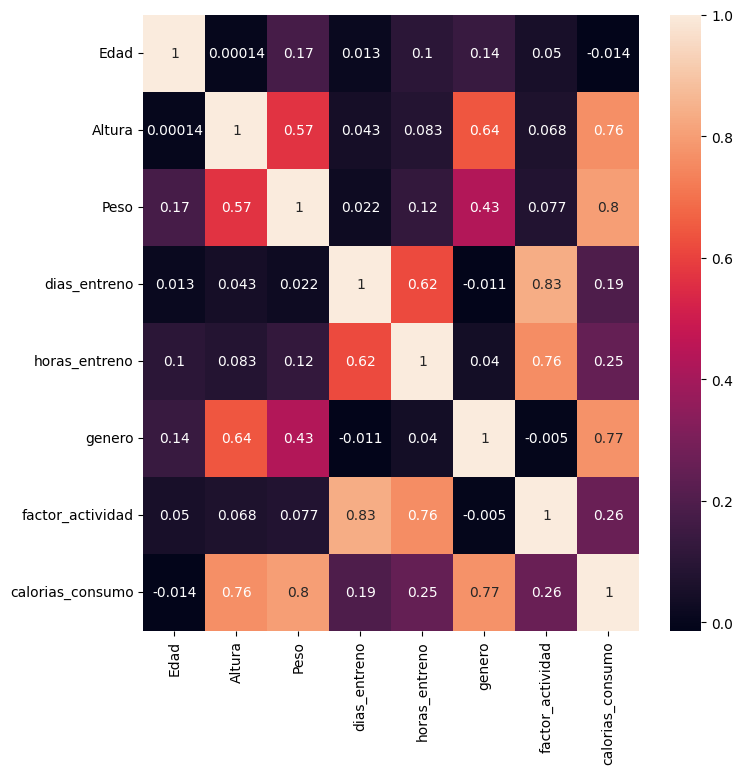

In [9]:
plt.figure(figsize=(8,8))
dataplot = sns.heatmap(df.corr(), annot=True)

In [10]:
#Separar test y train
x = df[["Edad", "Altura", "Peso", "dias_entreno", "horas_entreno", "genero", "factor_actividad"]]
y = df[["calorias_consumo"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
x_train.head()

,Edad,Altura,Peso,dias_entreno,horas_entreno,genero,factor_actividad
209,20,1.58,110.0,3,2,0,1.725
76,21,1.54,96.0,0,1,0,1.550
94,22,1.70,75.0,-1,-1,1,1.200
221,22,1.72,130.0,-1,-1,1,1.200
310,18,1.77,154.0,-1,-1,1,1.200


In [12]:
modelo = LinearRegression().fit(x_train, y_train)

prediccion_test = modelo.predict(x_test)

prediccion_test[0:5]

array([[2332.86435564],
       [2325.75909521],
       [1964.86885108],
       [1359.89839246],
       [1925.50929641]])

In [19]:
#Guardar Modelo
joblib.dump(modelo,"modelo_calorias.pkl")

#Modleo entrenado
modelo_entrenado = joblib.load("modelo_calorias.pkl")

<AxesSubplot: ylabel='calorias_consumo'>

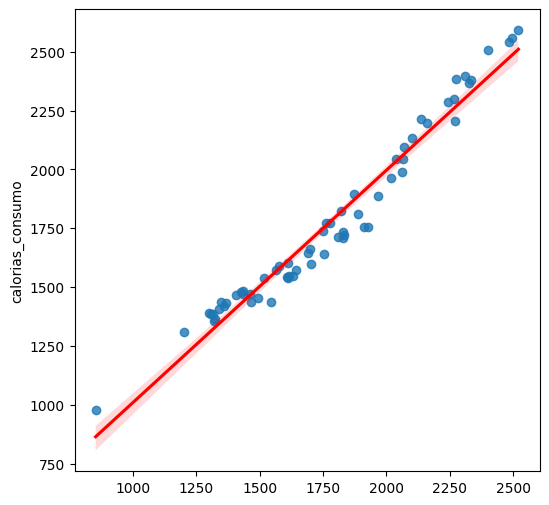

In [13]:
plt.figure(figsize=(6,6))
sns.regplot(x=prediccion_test, y=y_test, line_kws={"color":"red"})

In [14]:
print(f'COEF. REAL:{modelo.score(x_test, y_test): .2f}')
print(f'COEF. PREDICTED:{modelo.score(x_test, prediccion_test): .2f}')

print(f'ERROR ABSOLUTO MEDIO:{metrics.mean_absolute_error(y_test, prediccion_test): .2f}')
print(f'SQRT ERROR:{np.sqrt(metrics.mean_squared_error(y_test, prediccion_test)): .2f}')

print('INTERCEPTO:', modelo.intercept_[0])
print('COEFICIENTES:', modelo.coef_)

COEF. REAL: 0.96
COEF. PREDICTED: 1.00
ERROR ABSOLUTO MEDIO: 61.19
SQRT ERROR: 71.63
INTERCEPTO: -593.2544270581184
COEFICIENTES: [[-1.03116290e+01  5.68716599e+02  5.71995943e+00 -8.07836003e-01
   3.55391433e-01  3.71755564e+02  4.49219878e+02]]


In [15]:
modelo.predict([[21,1.56,145,0,1,1,1.2]])

C:\Users\adali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1817.96818514]])

In [20]:
#Predicr Modelo Guardado
modelo_entrenado.predict([[21,1.56,145,0,1,1,1.2]])

C:\Users\adali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1817.96818514]])